In [1]:
# import PennyLane library

import pennylane as qml
from pennylane import numpy as np
import torch
from torch.autograd import Variable

In [2]:
dev3 = qml.device('default.qubit', wires = 3)

In [3]:
@qml.qnode(dev3, interface = 'torch')
def circuit3(p1, p2):
    qml.Rot(p1[0], p1[1], p1[2], wires = 1)
    qml.Rot(p2[0], p2[1], p2[2], wires = 2)
    return qml.expval.PauliZ(0), qml.expval.PauliZ(1), qml.expval.PauliZ(2) 

In [4]:
def cost(var1,var2):
    spins = circuit3(var1, var2)
    energy = -(1*spins[0]*spins[1]) - (-1*spins[1]*spins[2])
    return energy

In [5]:
torch.manual_seed(9)
pt3 = Variable((np.pi*torch.rand(3, dtype = torch.float64)), requires_grad = True)
pt4 = Variable((np.pi*torch.rand(3, dtype = torch.float64)), requires_grad = True)
var_init_loc = [pt3, pt4]
cost_init_loc = cost(pt3, pt4)
print(cost_init_loc)

tensor(0.0082, dtype=torch.float64, grad_fn=<SubBackward0>)


In [6]:
# optimizing using PyTorch optimizer 

opt = torch.optim.SGD(var_init_loc, lr = 0.1)

def closure():
    opt.zero_grad()
    loss = cost(pt3, pt4)
    loss.backward()
    return loss


var_pt_loc = [var_init_loc]
cost_pt_loc = [cost_init_loc]
x = [0]

for j in range(100):
    opt.step(closure)
    if (j + 1) % 5 == 0:
        pt3, pt4 = opt.param_groups[0]['params']
        costn = cost(pt3, pt4)
        var_pt_loc.append([pt3,pt4])
        cost_pt_loc.append(costn)
        print('Energy after step {:5d}: {: .7f} | Angles: {}'.format(j+1,costn, [pt3.detach().numpy(), pt4.detach().numpy()]),"\n")

Energy after step     5:  0.0032761 | Angles: [array([0.77369911, 2.63471297, 1.07981163]), array([0.26038622, 0.08659858, 1.91060734])] 

Energy after step    10:  0.0013137 | Angles: [array([0.77369911, 2.63406019, 1.07981163]), array([0.26038622, 0.05483683, 1.91060734])] 

Energy after step    15:  0.0005266 | Angles: [array([0.77369911, 2.63379816, 1.07981163]), array([0.26038622, 0.03471974, 1.91060734])] 

Energy after step    20:  0.0002111 | Angles: [array([0.77369911, 2.63369307, 1.07981163]), array([0.26038622, 0.02198151, 1.91060734])] 

Energy after step    25:  0.0000846 | Angles: [array([0.77369911, 2.63365094, 1.07981163]), array([0.26038622, 0.01391648, 1.91060734])] 

Energy after step    30:  0.0000339 | Angles: [array([0.77369911, 2.63363405, 1.07981163]), array([0.26038622, 0.00881044, 1.91060734])] 

Energy after step    35:  0.0000136 | Angles: [array([0.77369911, 2.63362729, 1.07981163]), array([0.26038622, 0.00557782, 1.91060734])] 

Energy after step    40:  0

In [7]:
torch.manual_seed(56)
pt1 = Variable((np.pi*torch.rand(3, dtype = torch.float64)), requires_grad = True)
pt2 = Variable((np.pi*torch.rand(3, dtype = torch.float64)), requires_grad = True)
var_init = [pt1, pt2]
cost_init = cost(pt1, pt2)
print(cost_init)

tensor(1.6792, dtype=torch.float64, grad_fn=<SubBackward0>)


In [8]:
opt = torch.optim.SGD(var_init, lr = 0.1)

def closure():
    opt.zero_grad()
    loss = cost(pt1, pt2)
    loss.backward()
    return loss


var_pt = [var_init]
cost_pt = [cost_init]

for j in range(100):
    opt.step(closure)
    if (j + 1) % 5 == 0:
        pt1, pt2 = opt.param_groups[0]['params']
        costn = cost(pt1, pt2)
        var_pt.append([pt1,pt2])
        cost_pt.append(costn)
        print('Energy after step {:5d}: {: .7f} | Angles: {}'.format(j+1,costn, [pt1.detach().numpy(), pt2.detach().numpy()]),"\n")

Energy after step     5:  0.6846474 | Angles: [array([1.96323939, 1.93604492, 2.32767565]), array([0.65212549, 2.73080219, 2.4299563 ])] 

Energy after step    10: -1.0138530 | Angles: [array([1.96323939, 1.0136468 , 2.32767565]), array([0.65212549, 2.73225282, 2.4299563 ])] 

Energy after step    15: -1.8171995 | Angles: [array([1.96323939, 0.38483073, 2.32767565]), array([0.65212549, 2.85992571, 2.4299563 ])] 

Energy after step    20: -1.9686584 | Angles: [array([1.96323939, 0.13026452, 2.32767565]), array([0.65212549, 2.97097572, 2.4299563 ])] 

Energy after step    25: -1.9930403 | Angles: [array([1.96323939, 0.04302756, 2.32767565]), array([0.65212549, 3.04042222, 2.4299563 ])] 

Energy after step    30: -1.9980133 | Angles: [array([1.96323939, 0.01413292, 2.32767565]), array([0.65212549, 3.08179844, 2.4299563 ])] 

Energy after step    35: -1.9993550 | Angles: [array([1.96323939, 0.00463472, 2.32767565]), array([0.65212549, 3.10627578, 2.4299563 ])] 

Energy after step    40: -1

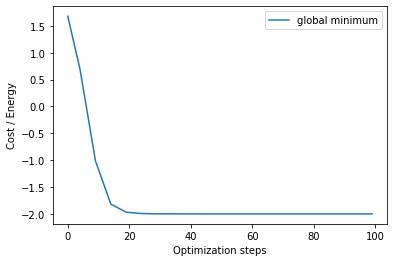

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
x = [0]
for k in range(100):
    if (k + 1) % 5 == 0:
        x.append(k)

params = {'figure.figsize': (6, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
        
fig = plt.figure()
plt.plot(x, cost_pt, label = 'global minimum')
plt.xlabel("Optimization steps")
plt.ylabel("Cost / Energy")
plt.legend()
plt.show()

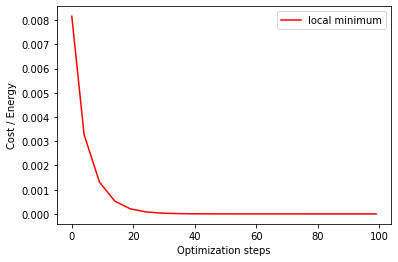

In [13]:
fig = plt.figure()
plt.plot(x, cost_pt_loc, 'r', label = 'local minimum')
plt.xlabel("Optimization steps")
plt.ylabel("Cost / Energy")
plt.legend()
plt.show()

In [15]:
x = [0]
for k in range(100):
    if (k + 1) % 5 == 0:
        print(k)
        x.append(k)
print(x)

4
9
14
19
24
29
34
39
44
49
54
59
64
69
74
79
84
89
94
99
[0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]


In [24]:
test = np.arange(4,99,5)
print(test)

[ 4  9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94]


In [27]:
test1=[0] + test
print(test1)

[ 6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


In [29]:
y=[0]
for j in range(100):
    if (j + 1) % 5 == 0:
        y.append(j)
print(y)

[0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]
